# Proyecto Primer módulo 

## Programación lineal


En nuestro portafolio de inversiones tenemos 3 tipos de activos; Cetes, bonos y pagarés, los cetes nos brindan el .72% de interés mensual, los bonos el 1.92% semestral y los pagarés el 1.16% bimestralmente. mensualmente se saca una utilidad de 20,000 pesos en cetes, semestralmente 13,000 pesos en bonos y bimestralmente 4000 pesos en pagarés. 


Un inversionista quiere invertir 1,000,000 de pesos en diferentes activos los cuales son; Cetes, Pagarés y Obligaciones. Los cetes tienen de rendimiento 8%, los pagarés 6% y las obligaciones 7% . cuantos activos de cetes, pagarés y obligaciones deberá de comprar para maximizar sus ganancias con 1,000,000 de pesos.

In [67]:
# Escriba acá las matrices como arreglos de Numpy
import scipy.optimize as opt
import numpy as np
c = -np.array([.08,.05])
A = np.array([[3,1]])
b = np.array([12])

sol = opt.linprog(c,A,b,method='revised simplex')
sol

     con: array([], dtype=float64)
     fun: -0.6000000000000001
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.])
  status: 0
 success: True
       x: array([ 0., 12.])

In [68]:
import pandas as pd


In [69]:
archivo = 'inflación_mexico.csv'
datos = pd.read_csv(archivo)
datos

,Año,Inflación
0,2016,2.821708
1,2017,6.041457
2,2018,4.899350
3,2019,3.635961
4,2020,3.396834
5,2021,5.689208


In [70]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt



In [71]:
x = data.iloc[:,0]
y = data.iloc[:,1]
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

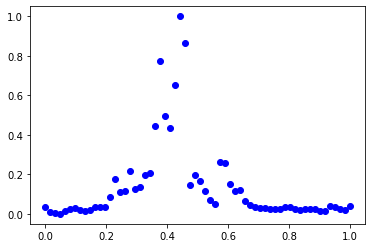

In [72]:
plt.plot(x_norm, y_norm, 'ob')

In [73]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [74]:
#Ajusta polinomio de grado 1
b01 = np.zeros(2)    #beta_inicial
ajuste1 = opt.minimize(fun_obj, b01, args=(x_norm,y_norm,1))

#Ajusta polinomio de grado 2
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x_norm,y_norm,2))

#Ajusta polinomio de grado 3
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x_norm,y_norm,3))

#Ajusta polinomio de grado 4
b04 = np.zeros(5)
ajuste4 = opt.minimize(fun_obj, b04, args=(x_norm,y_norm,4))

#Ajusta polinomio de grado 5
b01 = np.zeros(6)    #beta_inicial
ajuste5 = opt.minimize(fun_obj, b01, args=(x_norm,y_norm,5))

#Ajusta polinomio de grado 6
b02 = np.zeros(7)
ajuste6 = opt.minimize(fun_obj, b02, args=(x_norm,y_norm,6))

#Ajusta polinomio de grado 7
b03 = np.zeros(8)
ajuste7 = opt.minimize(fun_obj, b03, args=(x_norm,y_norm,7))

#Ajusta polinomio de grado 8
b04 = np.zeros(9)
ajuste8 = opt.minimize(fun_obj, b04, args=(x_norm,y_norm,8))

#Ajusta polinomio de grado 9
b04 = np.zeros(10)
ajuste9 = opt.minimize(fun_obj, b04, args=(x_norm,y_norm,9))

In [75]:
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)
yhat4 = ajuste4.x.dot([x_norm**i for i in range(5)])*(max(y)-min(y)) + min(y)
yhat5 = ajuste5.x.dot([x_norm**i for i in range(6)])*(max(y)-min(y)) + min(y)
yhat6 = ajuste6.x.dot([x_norm**i for i in range(7)])*(max(y)-min(y)) + min(y)
yhat7 = ajuste7.x.dot([x_norm**i for i in range(8)])*(max(y)-min(y)) + min(y)
yhat8 = ajuste8.x.dot([x_norm**i for i in range(9)])*(max(y)-min(y)) + min(y)
yhat9 = ajuste9.x.dot([x_norm**i for i in range(10)])*(max(y)-min(y)) + min(y)

In [76]:
import matplotlib.pyplot as plt

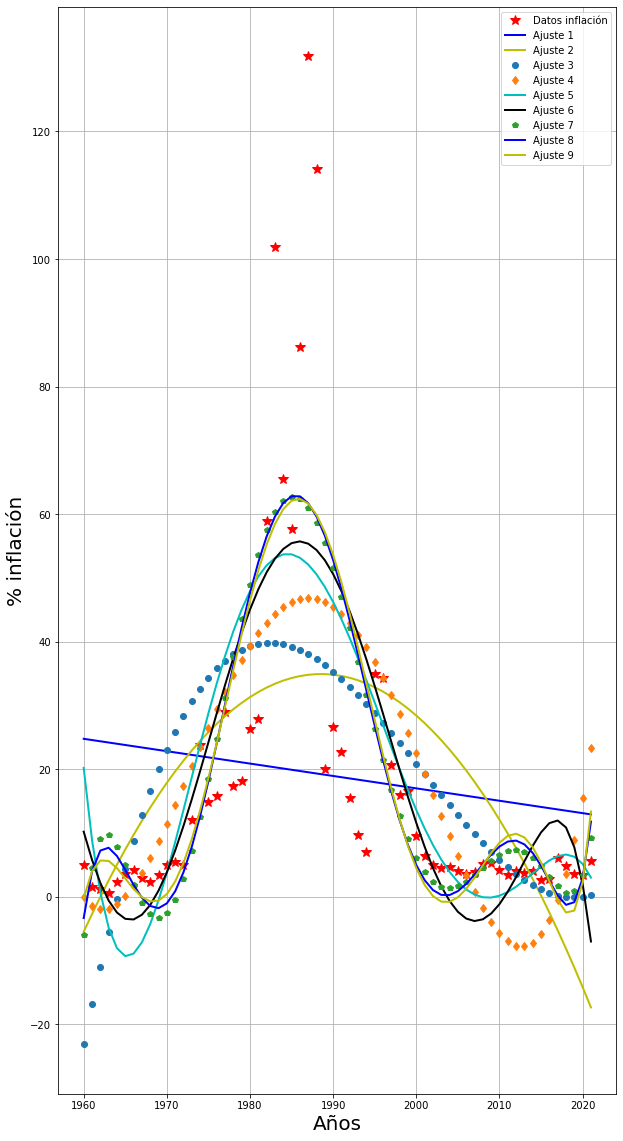

In [62]:
plt.figure(figsize=(10,20))

plt.plot(x, y, 'r*', ms=10, label='Datos inflación')
plt.plot(x, yhat1, 'b', lw=2, label='Ajuste 1')
plt.plot(x, yhat2, 'y', lw=2, label='Ajuste 2')
plt.plot(x, yhat3, 'o', lw=2, label='Ajuste 3')
plt.plot(x, yhat4, 'd', lw=2, label='Ajuste 4')
plt.plot(x, yhat5, 'c', lw=2, label='Ajuste 5')
plt.plot(x, yhat6, 'k', lw=2, label='Ajuste 6')
plt.plot(x, yhat7, 'p', lw=2, label='Ajuste 7')
plt.plot(x, yhat8, 'b', lw=2, label='Ajuste 8')
plt.plot(x, yhat9, 'y', lw=2, label='Ajuste 9')



plt.xlabel('Años',fontsize=20)
plt.ylabel('% inflación',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()